In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,10,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [7]:
noise

array([-2.21342759, -1.58839519,  2.46192763, ...,  0.36534892,
        0.2274045 , -1.16319871])

y = mx + b

b = 5

In [8]:
##looking to fixe the .5 value, adding noise to make it not a perfect fitted line
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [11]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [12]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
y_df.head()

,Y
0,2.786572
1,3.411610
2,7.461938
3,3.424461
4,7.131910


In [14]:
my_data = pd.concat([x_df,y_df],axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,2.786572
1,0.00001,3.411610
2,0.00002,7.461938
3,0.00003,3.424461
4,0.00004,7.131910


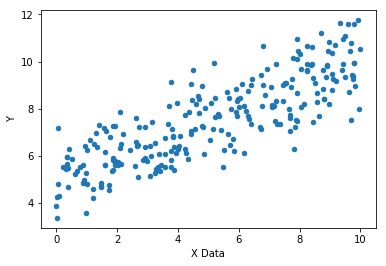

In [17]:
#to get 205 samples
my_data.sample(n=250).plot(kind="scatter",x="X Data",y="Y")

In [19]:
#cant feed in 1 milion at once, so we make batchs
batch_size = 8
np.random.randn(2)

array([-1.04271678,  1.12167999])

In [20]:
m = tf.Variable(-1.0)
b = tf.Variable(1.1)

In [21]:
xph = tf.placeholder(tf.float32,[batch_size])

In [22]:
yph = tf.placeholder(tf.float32,[batch_size])

In [23]:
#this here is the computation graph 
y_model = m*xph + b

In [24]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    #so we are doing 8000 samples
    batches = 1000
    
    for i in range(batches):
        #gets the random 8
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [29]:
model_m

0.53083867

In [30]:
model_b

4.9451385

In [31]:
y_hat = x_data*model_m + model_b

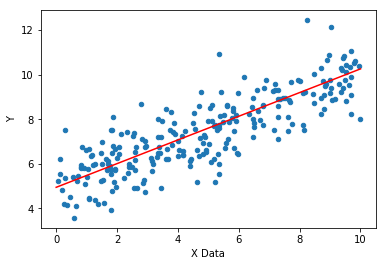

In [32]:
my_data.sample(250).plot(kind="scatter",x="X Data", y="Y")
plt.plot(x_data,y_hat,'r')